In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
sns.set_style("darkgrid")
import re
import datetime as dt

pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [24]:
matplotlib.rcParams['figure.figsize'] = (16.0, 10.0)

In [25]:
data = pd.read_csv("ufc_clean.csv")
data = data.set_index(pd.DatetimeIndex(data['Date']))
data.drop(['Date', 'Promotion'], axis=1, inplace=True)
data.head()

,Event,Main_Event,Title,Fighter_1,Fighter_2,Rematch,Venue,City,Attendance,Gate,Buyrate
Date,,,,,,,,,,,
1993-11-12,UFC 1,1,The Beginning,NaN,NaN,0,McNichols Sports Arena,"Denver, Colorado",7800.000,nan,86000.000
1994-03-11,UFC 2,1,No Way Out,NaN,NaN,0,Mammoth Gardens,"Denver, Colorado",2000.000,nan,300000.000
1994-09-09,UFC 3,1,The American Dream,NaN,NaN,0,Grady Cole Center,"Charlotte, North Carolina",3000.000,nan,90000.000
1994-12-16,UFC 4,1,Revenge of the Warriors,NaN,NaN,0,Expo Square Pavilion,"Tulsa, Oklahoma",5857.000,nan,120000.000
1995-04-07,UFC 5,1,Gracie vs. Shamrock 2,Gracie,Shamrock,1,Independence Arena,"Charlotte, North Carolina",6000.000,nan,260000.000


# Buyrate Analysis of UFC Main Events

In [26]:
ufc = data[data['Main_Event'] == 1]
ufc10 = ufc['2008':'2018']

In [27]:
# ufc 100
ufc10.at['2009-07-11', 'Title'] = 'UFC 100'

# UFC 229 PPV estimate
ufc10.at['2018-10-06', 'Buyrate'] = 2400000

# seperating the diaz bros
ufc10.at['2016-03-05', 'Fighter_2'] = 'Nick Diaz'
ufc10.at['2011-10-29', 'Fighter_2'] = 'Nick Diaz'
ufc10.at['2016-03-05', 'Fighter_2'] = 'Nate Diaz'
ufc10.at['2016-08-20', 'Fighter_1'] = 'Nate Diaz'


/home/will/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Impute missing Buyrate data

In [28]:
median_yearly_buy = ufc10.resample('Y')['Buyrate'].median()
years = median_yearly_buy.index.year
median_yearly_buy.index = years
median_yearly_buy

Date
2008   505000.000
2009   500000.000
2010   520000.000
2011   332500.000
2012   410000.000
2013   355000.000
2014   222500.000
2015   600000.000
2016   322000.000
2017   265000.000
2018   325000.000
Name: Buyrate, dtype: float64

In [29]:
null_ix = ufc10[ufc10['Buyrate'].isnull()]['Buyrate'].index

for i in null_ix:
    ufc10.at[i, 'Buyrate'] = median_yearly_buy[i.year]

### Average Buyrate

In [30]:
ufc10['Buyrate'].mean()

491482.3943661972

### Cumulative PPV Buys per Year

FileNotFoundError: [Errno 2] No such file or directory: 'images/1.png'

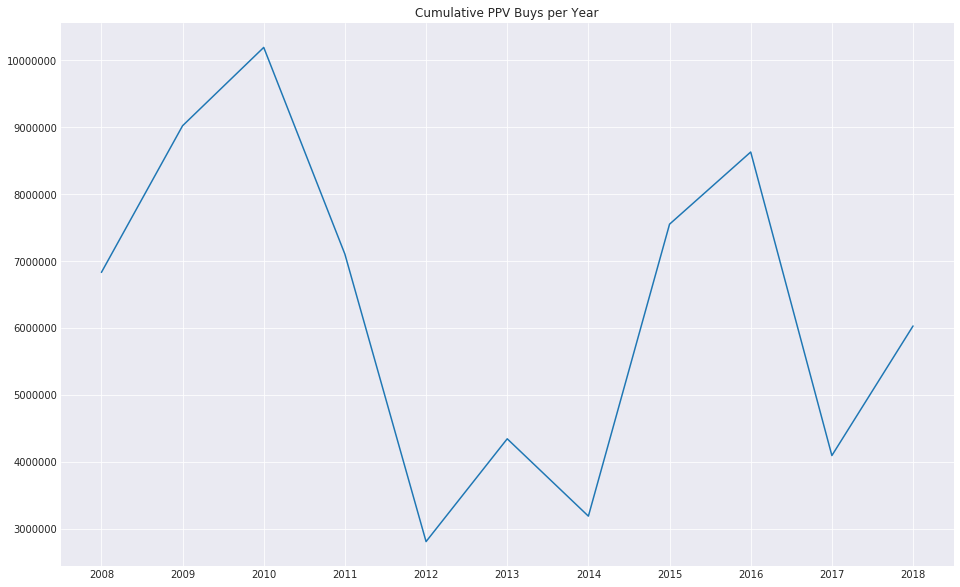

In [31]:
yearly_ppv_sum = ufc10.resample('Y')['Buyrate'].sum()
years = yearly_ppv_sum.index.year

plt.figure()
plt.plot(years, yearly_ppv_sum.values)

plt.ticklabel_format(style="plain")
plt.xticks(years)
plt.title("Cumulative PPV Buys per Year")
plt.savefig("images/1.png")

### Top PPV Event per Year

In [32]:
ufc10['2010'][['Event', 'Title','Buyrate']].sort_values(by='Buyrate', ascending=False).iloc[0].name

Timestamp('2010-07-03 00:00:00')

FileNotFoundError: [Errno 2] No such file or directory: 'images/2.png'

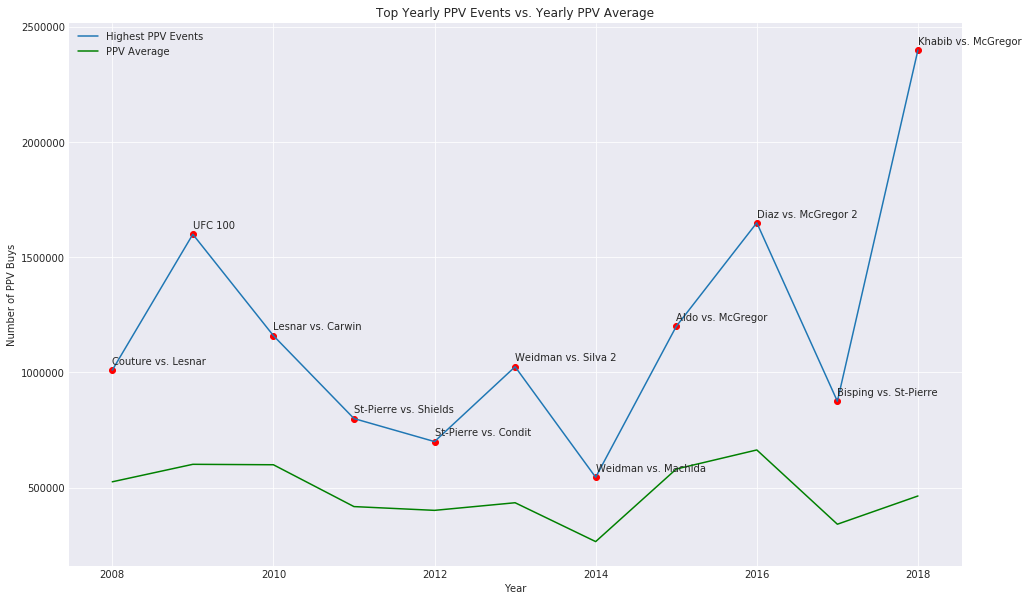

In [20]:
yearly_ppv_max = ufc10.resample('Y')['Buyrate'].max()
yearly_ppv_avg = ufc10.resample('Y')['Buyrate'].mean()

plt.figure()

plt.plot(years, yearly_ppv_max.values, label="Highest PPV Events")
plt.scatter(years, yearly_ppv_max.values, c='r')
plt.plot(years, yearly_ppv_avg.values, c='g', label="PPV Average")
plt.ylabel("Number of PPV Buys")
plt.xlabel("Year")


for year in years:
    top_event = ufc10[str(year)][['Event', 'Title','Buyrate']].sort_values(by='Buyrate', ascending=False).iloc[0]
    plt.annotate(top_event['Title'], (year, top_event['Buyrate'] + 25000))

plt.legend()
plt.title("Top Yearly PPV Events vs. Yearly PPV Average")
plt.savefig("images/2.png")

FileNotFoundError: [Errno 2] No such file or directory: 'images/3.png'

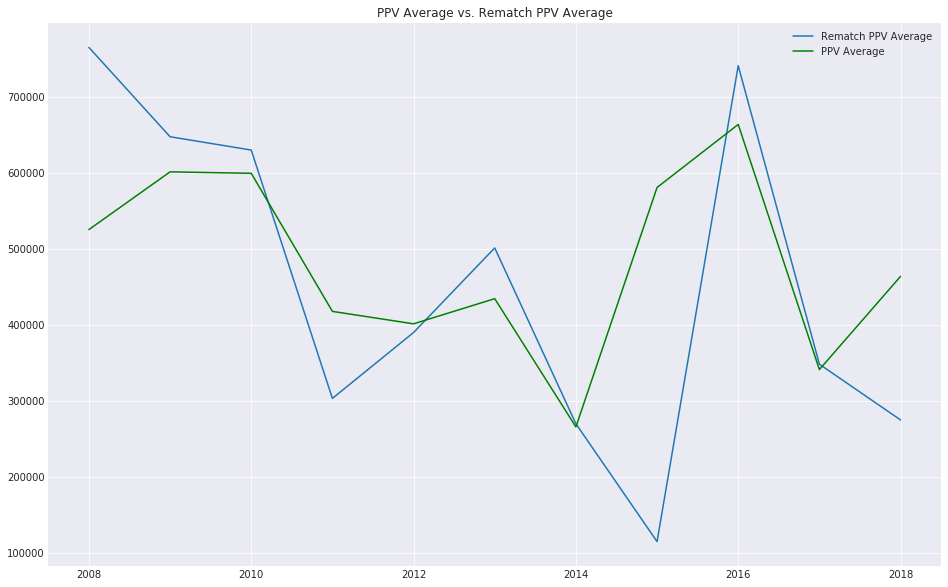

In [21]:
rematches = ufc10.loc[ufc10['Rematch'] == 1]
yearly_rematch_ppv_avg = rematches.resample('Y')['Buyrate'].mean()

plt.figure(figsize=(16, 10))

plt.plot(years, yearly_rematch_ppv_avg.values, label="Rematch PPV Average")
plt.plot(years, yearly_ppv_avg.values, c='g', label="PPV Average")

plt.legend()
plt.title("PPV Average vs. Rematch PPV Average")
plt.savefig("images/3.png")

In [22]:
round(yearly_rematch_ppv_avg / yearly_ppv_avg - 1, 2)

Date
2008-12-31    0.460
2009-12-31    0.080
2010-12-31    0.050
2011-12-31   -0.270
2012-12-31   -0.030
2013-12-31    0.150
2014-12-31    0.020
2015-12-31   -0.800
2016-12-31    0.120
2017-12-31    0.020
2018-12-31   -0.410
Freq: A-DEC, Name: Buyrate, dtype: float64

In [ ]:
plt.figure()
ufc10['Buyrate'].plot()
top10_fights = ufc10.sort_values('Buyrate', ascending=False)[:10]
plt.scatter(top10_fights.index, top10_fights['Buyrate'], c='r')

offset_ix = 1
offset_base = 26000
for i in top10_fights.index:
    offset_ix += 1
    if offset_ix % 2 == 0:
        offset = -(offset_base)
    else: offset = offset_base
    plt.annotate(ufc10.at[i, 'Title'], (i, ufc10.at[i, 'Buyrate'] + offset))

plt.title('UFC PPV Buyrate History 2008-2018')
plt.ylabel("PPV Buyrate")

plt.savefig("images/4.png")

In [ ]:
plt.figure()
ufc10['Buyrate'].hist(bins=30)

In [ ]:
fighter1 = ufc10.copy()
fighter1.insert(0, "Fighter", fighter1["Fighter_1"])

fighter2 = ufc10.copy()
fighter2.insert(0, "Fighter", fighter2["Fighter_2"])

fighters_df = pd.concat([fighter1, fighter2], sort=False)
headline_fights = fighters_df['Fighter'].value_counts()
headline_rematches = fighters_df.groupby('Fighter')['Rematch'].sum().sort_values(ascending=False)
# cum_ppv = fighters_df.groupby('Fighter')['Buyrate'].sum().sort_values(ascending=False)

fighters = fighters_df.pivot_table(values=['Attendance', 'Buyrate', 'Gate'], index='Fighter')
fighters['Headline Fights'] = headline_fights
fighters['Headline Rematches'] = headline_rematches
# fighters['Cumulative PPV Buys'] = cum_ppv


In [ ]:
fighters

In [ ]:
plt.figure()
headline_fights[:20].plot('bar')
plt.xticks(rotation=45)
plt.title("Top 20 Fighters by Number of Main Event Fights")
plt.ylabel("Number of Main Event Fights")
plt.xlabel("Fighters")

plt.savefig("images/5.png")

In [ ]:
plt.figure()
ppv_estimate = (fighters['Buyrate'] * fighters['Headline Fights']).astype(float).sort_values(ascending=False)
#plt.bar(ppv_estimate.index[:10], ppv_estimate.values[:10])
ppv_estimate[:20].plot('bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Top 20 Fighters by Lifetime PPV Buys (Est.)")
plt.ylabel("Lifetime PPV Buys")
plt.xlabel("Fighters")
plt.xticks(rotation=45)
plt.show()

plt.savefig("images/6.png")

In [ ]:
mcgregor = fighters_df.loc[fighters_df['Fighter'] == 'McGregor'].sort_index()

In [ ]:
plt.figure()


mcgregor['Buyrate'].plot()
plt.scatter(mcgregor.index, mcgregor['Buyrate'], c='r')

plt.scatter('2017-08-26', 4300000, c='g', marker='*', s=100)
plt.annotate('Mayweather vs. McGregor', ('2017-06-01', 4150000))

y_vals = [900000, 1100000, 1500000, 1800000, 1200000, 2600000]
for i, y in zip(mcgregor.index, y_vals):
    plt.annotate(mcgregor.at[i, 'Title'], (i, y))
    plt.annotate(mcgregor.at[i, 'Event'], (i, y - 100000))

plt.ylabel('PPV Buys')
plt.title("Conor McGregor's PPV History")

plt.savefig("images/7.png")

### Percentiles

In [ ]:
sorted_buyrates = ufc10['Buyrate'].sort_values()

np.percentile(sorted_buyrates, 50)

In [ ]:
perc_95 = ufc10.loc[ufc10.Buyrate >= np.percentile(sorted_buyrates, 95)]

import pprint as pp

pp.pprint([x for x in zip(perc_95['Title'], perc_95['Buyrate'])])